In a previous notebook, I have shown that the [](https://laurentperrinet.github.io/sciblog/posts/2021-03-27-density-of-stars-on-the-surface-of-the-sky.html). Here, I would like to use the existing database of stars' positions 

<!-- TEASER_END -->

Let's first initialize the notebook:

In [1]:
import numpy as np
np.set_printoptions(precision=6, suppress=True)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
phi = (np.sqrt(5)+1)/2
fig_width = 10
figsize = (fig_width, fig_width/phi)

Importing all stars' position is as simple as invoking the [HYG database](https://github.com/astronexus/HYG-Database):

In [2]:
import pandas as pd
url = "https://github.com/astronexus/HYG-Database/raw/master/hygdata_v3.csv"
space = pd.read_csv(url)

In [3]:
print(f'Columns in the database: {space.columns=}')

space.columns=Index(['id', 'hip', 'hd', 'hr', 'gl', 'bf', 'proper', 'ra', 'dec', 'dist',
       'pmra', 'pmdec', 'rv', 'mag', 'absmag', 'spect', 'ci', 'x', 'y', 'z',
       'vx', 'vy', 'vz', 'rarad', 'decrad', 'pmrarad', 'pmdecrad', 'bayer',
       'flam', 'con', 'comp', 'comp_primary', 'base', 'lum', 'var', 'var_min',
       'var_max'],
      dtype='object')


In [6]:
print(f'Number of stars in the catalog = {len(space)=}')

Number of stars in the catalog = len(space)=119614


For which we may extract what interests us: position (right ascension and declination) and brightness:

In [7]:
space_pos = space[['ra', 'dec', 'lum']]
space_pos

,ra,dec,lum
0,0.000000,0.000000,1.000000
1,0.000060,1.089009,9.638290
2,0.000283,-19.498840,0.392283
3,0.000335,38.859279,386.901132
4,0.000569,-51.893546,9.366989
...,...,...,...
119609,23.963895,38.629391,0.002200
119610,23.996567,47.762093,0.000088
119611,23.996218,-44.067905,0.002224
119612,23.997386,-34.111986,0.001086


First, [right ascension](https://en.wikipedia.org/wiki/Right_ascension) is "the angular distance of a particular point measured eastward along the celestial equator from the Sun at the March equinox to the (hour circle of the) point in question above the earth." It is given in *hours*:

In [11]:
ra_min, ra_max = 0, 24
print(f"RA: {space['ra'].min()=}, {space['ra'].max()=}")

RA: space['ra'].min()=0.0, space['ra'].max()=23.998594


Then, [declination](https://en.wikipedia.org/wiki/Declination) is "comparable to geographic latitude, projected onto the celestial sphere" and is given here in degrees:

In [12]:
print(f"DEC: {space['dec'].min()=}, {space['dec'].max()=}")

DEC: space['dec'].min()=-89.782428, space['dec'].max()=89.569427


The brightness varies a lot:

In [12]:
print(f"LUM: {space['lum'].min()=}, {space['lum'].max()=}")

DEC: space['dec'].min()=-89.782428, space['dec'].max()=89.569427


From these elements, we may plot the stars on these coordinates:

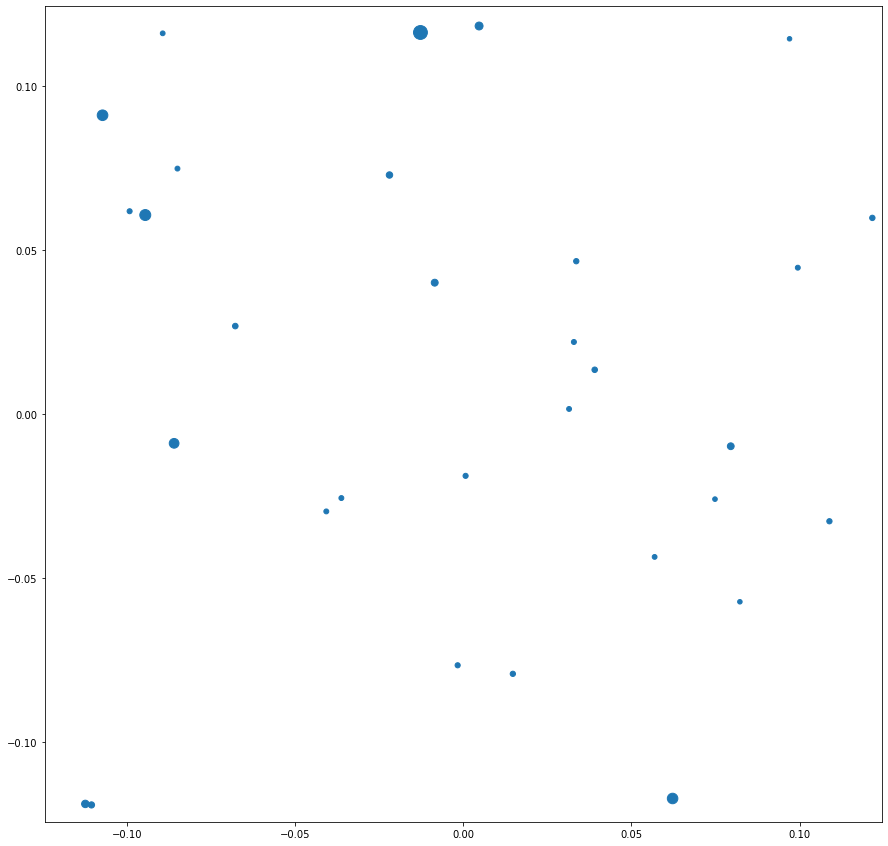

In [12]:
fig, ax = plt.subplots(figsize=(fig_width, fig_width))
d = np.sqrt((pos**2).sum(axis=0))
ax.scatter(space['ra'], space['dec'], s=20 * space['lum'])
ax.set_xlim(ra_min, ra_max)
ax.set_ylim(dec_min, dec_max);

## some book keeping for the notebook

In [ ]:
%load_ext watermark
%watermark -i -h -m -v -p numpy,matplotlib,scipy,pillow,imageio  -r -g -b